In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('datamoi.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pixel1   259 non-null    float64
 1   Pixel2   259 non-null    float64
 2   Pixel3   259 non-null    float64
 3   Pixel4   259 non-null    float64
 4   Pixel5   259 non-null    float64
 5   Pixel6   259 non-null    float64
 6   Pixel7   259 non-null    float64
 7   Pixel8   259 non-null    float64
 8   Pixel9   259 non-null    float64
 9   Pixel10  259 non-null    float64
 10  Pixel11  259 non-null    float64
 11  Pixel12  259 non-null    float64
 12  Pixel13  259 non-null    float64
 13  Pixel14  259 non-null    float64
 14  Pixel15  259 non-null    float64
 15  Pixel16  259 non-null    float64
 16  Mat      259 non-null    float64
dtypes: float64(17)
memory usage: 34.5 KB


,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Mat
0,0.243137,0.427451,0.278431,0.070588,0.635294,0.305882,0.121569,0.137255,0.533333,0.345098,0.145098,0.313725,0.674510,0.572549,0.180392,0.164706,1.0
1,0.203922,0.294118,0.298039,0.152941,0.101961,0.215686,0.274510,0.082353,0.121569,0.423529,0.388235,0.372549,0.541176,0.682353,0.568627,0.458824,1.0
2,0.192157,0.407843,0.262745,0.066667,0.580392,0.317647,0.109804,0.129412,0.537255,0.360784,0.141176,0.356863,0.674510,0.568627,0.184314,0.168627,1.0
3,0.337255,0.176471,0.184314,0.815686,0.286275,0.149020,0.207843,0.278431,0.262745,0.192157,0.278431,0.752941,0.294118,0.250980,0.580392,0.486275,1.0
4,0.337255,0.176471,0.184314,0.815686,0.286275,0.149020,0.207843,0.278431,0.262745,0.192157,0.278431,0.752941,0.294118,0.250980,0.580392,0.486275,1.0


In [3]:
# Loại bỏ các giá trị trùng lặp
df = df.drop_duplicates()

# Loại bỏ các hàng chứa giá trị trống (NaN)
df = df.dropna()

# Hiển thị thông tin DataFrame sau khi loại bỏ trùng lặp và trống
print("Thông tin DataFrame sau khi xử lý:")
df.info()

# Lưu lại file CSV đã xử lý
df.to_csv('cleaned_dataset.csv', index=False)

print("Đã lưu dữ liệu đã được xử lý vào 'cleaned_dataset.csv'.")

Thông tin DataFrame sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 258
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pixel1   238 non-null    float64
 1   Pixel2   238 non-null    float64
 2   Pixel3   238 non-null    float64
 3   Pixel4   238 non-null    float64
 4   Pixel5   238 non-null    float64
 5   Pixel6   238 non-null    float64
 6   Pixel7   238 non-null    float64
 7   Pixel8   238 non-null    float64
 8   Pixel9   238 non-null    float64
 9   Pixel10  238 non-null    float64
 10  Pixel11  238 non-null    float64
 11  Pixel12  238 non-null    float64
 12  Pixel13  238 non-null    float64
 13  Pixel14  238 non-null    float64
 14  Pixel15  238 non-null    float64
 15  Pixel16  238 non-null    float64
 16  Mat      238 non-null    float64
dtypes: float64(17)
memory usage: 33.5 KB
Đã lưu dữ liệu đã được xử lý vào 'cleaned_dataset.csv'.


In [ ]:
df.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Mat
0,0.243137,0.427451,0.278431,0.070588,0.635294,0.305882,0.121569,0.137255,0.533333,0.345098,0.145098,0.313725,0.674510,0.572549,0.180392,0.164706,1.0
1,0.203922,0.294118,0.298039,0.152941,0.101961,0.215686,0.274510,0.082353,0.121569,0.423529,0.388235,0.372549,0.541176,0.682353,0.568627,0.458824,1.0
2,0.192157,0.407843,0.262745,0.066667,0.580392,0.317647,0.109804,0.129412,0.537255,0.360784,0.141176,0.356863,0.674510,0.568627,0.184314,0.168627,1.0
3,0.337255,0.176471,0.184314,0.815686,0.286275,0.149020,0.207843,0.278431,0.262745,0.192157,0.278431,0.752941,0.294118,0.250980,0.580392,0.486275,1.0
8,0.411765,0.419608,0.509804,0.584314,0.533333,0.403922,0.415686,0.109804,0.549020,0.588235,0.494118,0.474510,0.498039,0.588235,0.725490,0.674510,1.0


Mat
1.0    120
0.0    118
Name: count, dtype: int64


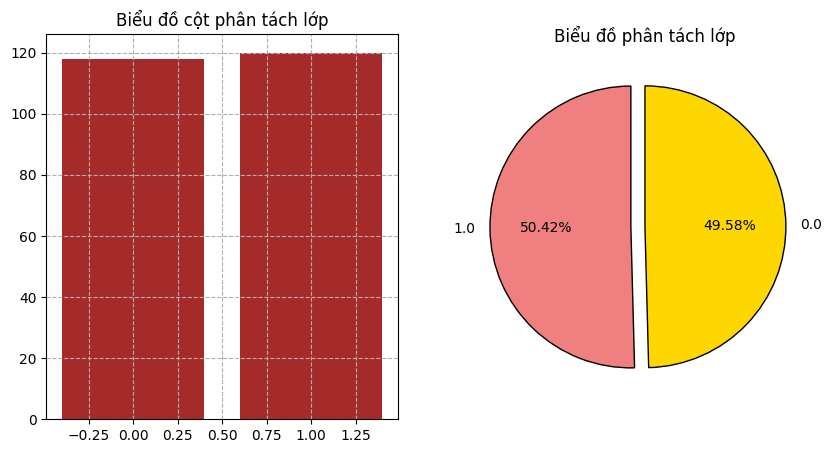

In [5]:
# Kiểm tra cân bằng dữ liệu
check = df['Mat'].value_counts()
print(check)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(check.index, check.values, color='brown')
plt.grid(ls='--')
plt.title('Biểu đồ cột phân tách lớp')

# Biểu đồ tròn
plt.subplot(1, 2, 2)
colors = ['lightcoral', 'gold', 'skyblue', 'lightgreen']  # Màu sắc tùy chỉnh
explode = [0.1 if value == max(check.values) else 0 for value in check.values]  # Làm nổi bật phần lớn nhất

# Vẽ biểu đồ tròn và lưu lại wedges (phần biểu đồ)
wedges, texts, autotexts = plt.pie(
    check.values,
    labels=check.index,
    autopct='%.2f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Biểu đồ phân tách lớp')
plt.show()

In [6]:
X = df.loc[:, ['Pixel1','Pixel2', 'Pixel3', 'Pixel4', 'Pixel5', 'Pixel6', 'Pixel7', 'Pixel8', 'Pixel9', 'Pixel10', 'Pixel11', 'Pixel12', 'Pixel13', 'Pixel14', 'Pixel15', 'Pixel16']].values  # Các cột dữ liệu (tất cả trừ cột cuối)
print(X)

[[0.24313725 0.42745098 0.27843137 ... 0.57254902 0.18039216 0.16470588]
 [0.20392157 0.29411765 0.29803922 ... 0.68235294 0.56862745 0.45882353]
 [0.19215686 0.40784314 0.2627451  ... 0.56862745 0.18431373 0.16862745]
 ...
 [0.39607843 0.3372549  0.3254902  ... 0.83921569 0.68627451 0.56078431]
 [0.35686275 0.33333333 0.34117647 ... 0.82352941 0.6627451  0.54117647]
 [0.37647059 0.34509804 0.34901961 ... 0.82745098 0.67058824 0.50980392]]


In [7]:
y = df.loc[:,'Mat'].values
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
#Thực hiện tách theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True) 
print('Tổng số mẫu dữ liệu   :', len(y))
print('Số mẫu trong tập Train:',len(y_train))
print('Số mẫu trong tập Test :',len(y_test))

Tổng số mẫu dữ liệu   : 238
Số mẫu trong tập Train: 190
Số mẫu trong tập Test : 48


In [9]:
from sklearn.linear_model import LogisticRegression
# Khởi tạo và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = model.predict(X_test)
#So sánh kết quả dự đoán với kết quả thật với 20 hành bn đầu tiên:
print('Giá trị thật         :', y_test[:20])
print('Mô hình dự đoán.     :', y_pred[:20])

Giá trị thật         : [0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
Mô hình dự đoán.     : [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]


In [11]:
#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test = accuracy_score(y_test,y_pred, normalize=False)

print('Tổng số mẫu trong tập test:', len(y_test))
print('Số mẫu dự đoán đúng       :', acc_test)
print('Số mẫu dự đoán sai        :', len(y_test) - acc_test)

Tổng số mẫu trong tập test: 48
Số mẫu dự đoán đúng       : 45.0
Số mẫu dự đoán sai        : 3.0


In [12]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc1_train =model.score(X_train,y_train)
print('Độ chính xác trên tập train:',acc1_train)
print('độ chính xác trên tập train(%)', round(acc1_train*100,2),'(%)')

Độ chính xác trên tập train: 0.9263157894736842
độ chính xác trên tập train(%) 92.63 (%)


Ma trận nhầm lẫn:
[[27  2]
 [ 1 18]]


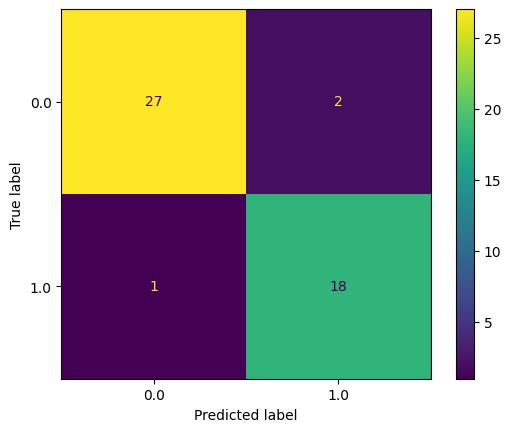

In [13]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_partient = confusion_matrix(y_test,y_pred)

#Hiển thị ma trân:
print('Ma trận nhầm lẫn:')
print(cnf_matrix_partient)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [14]:

# Nhập tay các giá trị pixel cho ảnh 4x4 (16 giá trị pixel)
print("Nhập 16 giá trị pixel cho ảnh 4x4 (giá trị từ 0 đến 255):")
image_pixels = []

# Nhập từng giá trị pixel và chuyển thành float
for i in range(16):
    while True:
        try:
            pixel_value = float(input(f"Pixel {i+1}: "))  # Nhập từng giá trị pixel và ép kiểu float
            if 0 <= pixel_value <= 255:  # Kiểm tra nếu giá trị hợp lệ (giữa 0 và 255)
                image_pixels.append(pixel_value)
                break
            else:
                print("Giá trị phải nằm trong phạm vi từ 0 đến 255. Vui lòng nhập lại.")
        except ValueError:
            print("Vui lòng nhập một số hợp lệ.")

# Chuyển dữ liệu nhập tay thành numpy array và reshape thành dạng (1, 16)
image_data = np.array(image_pixels).reshape(1, -1)  # reshape thành vector 1D (1 x 16)

# Chuẩn hóa dữ liệu (chia cho 255 để đưa về [0, 1])
image_data = image_data / 255.0

# Dự đoán nhãn (mắt mở hay mắt nhắm) với mô hình đã huấn luyện
prediction = model.predict(image_data)

# Kiểm tra kết quả dự đoán
if prediction == 1:
    print("Mắt mở")
else:
    print("Không phải mắt mở")


Nhập 16 giá trị pixel cho ảnh 4x4 (giá trị từ 0 đến 255):
Mắt mở
